In [236]:
import numpy as np
import pandas as pd

In [237]:
# movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmdb_5000_movies.csv')
# credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tmdb_5000_credits.csv')
credits = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tmdb_5000_credits.csv")
movies = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/tmdb_5000_movies.csv")

In [238]:
movies['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

In [239]:
popu = movies['popularity'].values
popu = np.sort(popu)[::-1]

In [240]:
most = 0
okok = 0
dont = 0
for i in popu:
  if i>=50:
    most +=1
  elif i<50 and i>=25:
    okok +=1
  else:
    dont +=1
print(f'most:{most}, okok:{okok}, dont:{dont}')

most:452, okok:935, dont:3416


In [241]:
movies = movies.merge(credits, right_on=['movie_id', 'title'], left_on=['id', 'title'])

In [242]:
movies.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [243]:
# movies = movies[movies['popularity']>=50]

In [244]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [245]:
movies = movies.drop(['original_title','production_companies',
       'production_countries','spoken_languages', 'tagline'],axis=1)

In [246]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'overview', 'popularity', 'release_date', 'revenue', 'runtime',
       'status', 'title', 'vote_average', 'vote_count', 'movie_id', 'cast',
       'crew'],
      dtype='object')

In [247]:
movies = movies[['movie_id','title','overview','genres','keywords','cast','crew','budget','revenue','original_language','vote_average', 'vote_count','runtime']]

In [248]:
movies.columns

Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew',
       'budget', 'revenue', 'original_language', 'vote_average', 'vote_count',
       'runtime'],
      dtype='object')

In [249]:
movies.head(1)

,movie_id,title,overview,genres,keywords,cast,crew,budget,revenue,original_language,vote_average,vote_count,runtime
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",237000000,2787965087,en,7.2,11800,162.0


In [250]:
# are there any duplicates?

dup_ = movies[movies.duplicated()]
print(dup_.shape)
dup_.shape[0],(dup_.shape[0]/movies.shape[0])*100

(0, 13)


(0, 0.0)

In [251]:
# is there any missing values?

movies.isna().sum().sort_values(ascending=False)

overview             3
runtime              2
movie_id             0
title                0
genres               0
keywords             0
cast                 0
crew                 0
budget               0
revenue              0
original_language    0
vote_average         0
vote_count           0
dtype: int64

In [252]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4803 non-null   int64  
 1   title              4803 non-null   object 
 2   overview           4800 non-null   object 
 3   genres             4803 non-null   object 
 4   keywords           4803 non-null   object 
 5   cast               4803 non-null   object 
 6   crew               4803 non-null   object 
 7   budget             4803 non-null   int64  
 8   revenue            4803 non-null   int64  
 9   original_language  4803 non-null   object 
 10  vote_average       4803 non-null   float64
 11  vote_count         4803 non-null   int64  
 12  runtime            4801 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 525.3+ KB


In [253]:
# movies.isnull().sum()
movies.dropna(inplace=True)
# movies.isnull().sum()
# movies.duplicated().sum()

In [254]:
movies = movies.dropna()

In [255]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4800 entries, 0 to 4802
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           4800 non-null   int64  
 1   title              4800 non-null   object 
 2   overview           4800 non-null   object 
 3   genres             4800 non-null   object 
 4   keywords           4800 non-null   object 
 5   cast               4800 non-null   object 
 6   crew               4800 non-null   object 
 7   budget             4800 non-null   int64  
 8   revenue            4800 non-null   int64  
 9   original_language  4800 non-null   object 
 10  vote_average       4800 non-null   float64
 11  vote_count         4800 non-null   int64  
 12  runtime            4800 non-null   float64
dtypes: float64(2), int64(4), object(7)
memory usage: 525.0+ KB


In [256]:
movies.isna().sum().sort_values(ascending=False)

movie_id             0
title                0
overview             0
genres               0
keywords             0
cast                 0
crew                 0
budget               0
revenue              0
original_language    0
vote_average         0
vote_count           0
runtime              0
dtype: int64

In [257]:
movies.describe()

,movie_id,budget,revenue,vote_average,vote_count,runtime
count,4800.000000,4.800000e+03,4.800000e+03,4800.000000,4800.000000,4800.000000
mean,56967.252917,2.905988e+07,8.231205e+07,6.092917,690.645208,106.880833
std,88350.548128,4.073043e+07,1.628950e+08,1.191468,1234.853376,22.611663
min,5.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
25%,9012.750000,7.950000e+05,0.000000e+00,5.600000,54.000000,94.000000
50%,14623.500000,1.500000e+07,1.918199e+07,6.200000,236.000000,103.000000
75%,58512.500000,4.000000e+07,9.293886e+07,6.800000,737.250000,118.000000
max,447027.000000,3.800000e+08,2.787965e+09,10.000000,13752.000000,338.000000


# __Exploratory Data Analysis__

In [258]:
good = 0
excellent = 0
votes = movies['vote_count']
votes = votes.values
for i in range(len(votes)):
  if votes[i]>=1000:
    excellent +=1
  else:
    good +=1
vote_count_groups={'good(500,1000)':good,'excellent(>1000)':excellent}


In [259]:
vote_categories = list(vote_count_groups.keys())
vote_categories_count = list(vote_count_groups.values())

([0, 1], [Text(0, 0, 'good(500,1000)'), Text(1, 0, 'excellent(>1000)')])

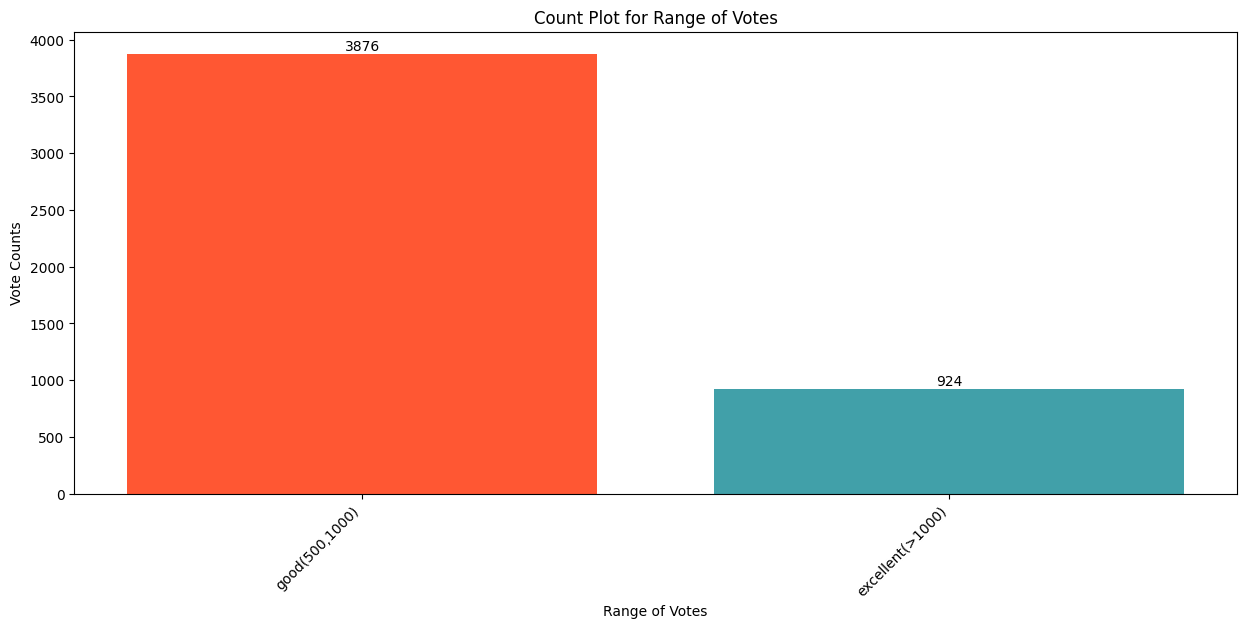

In [260]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 6))
bars = plt.bar(vote_categories, vote_categories_count,color=["#FF5733", "#41A0A9", "#99FF33", "#FF3399", "#4D4D4D"])
#  ['b', 'g', 'r', 'c', 'm'])
for bar, count in zip(bars, vote_categories_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom')
plt.xlabel('Range of Votes')
plt.ylabel('Vote Counts')
plt.title('Count Plot for Range of Votes')
plt.xticks(rotation=45, ha='right')

In [261]:
profit_loss = (movies['revenue'] - movies['budget']).values
profit = 0
loss = 0
nothing = 0
for i in profit_loss:
  if i>0:
    profit+=1
  elif i<0:
    loss+=1
  else:
    nothing +=1

verdict = {'profit':profit,'loss':loss,'nothing':nothing}

In [262]:
verdict_categories = list(verdict.keys())
verdict_categories_count = list(verdict.values())

([0, 1, 2], [Text(0, 0, 'profit'), Text(1, 0, 'loss'), Text(2, 0, 'nothing')])

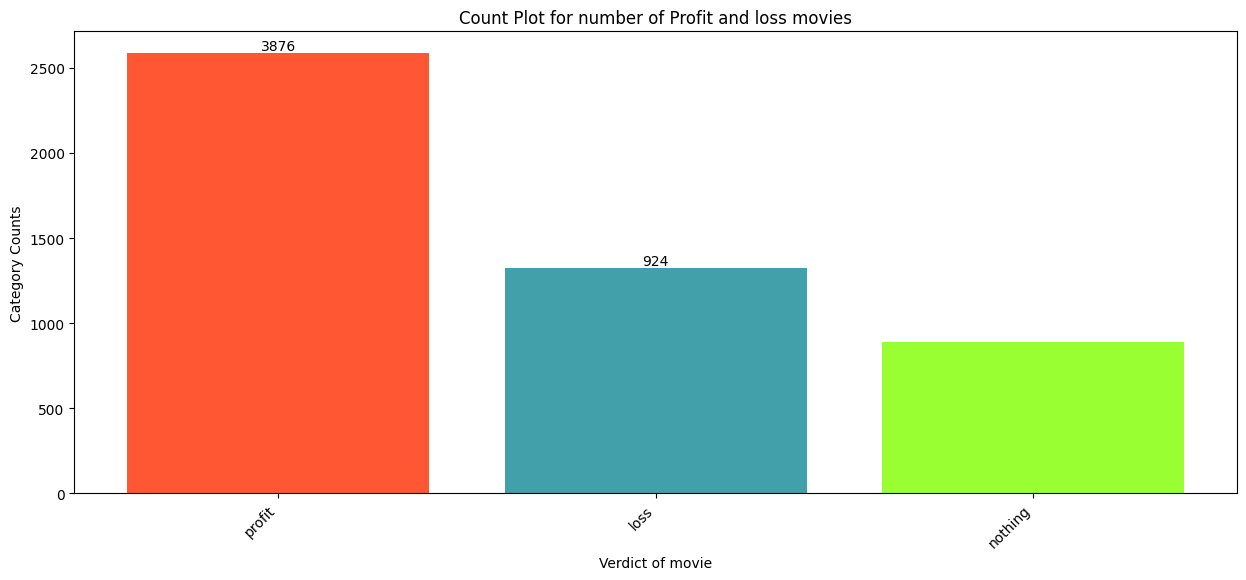

In [263]:
plt.figure(figsize=(15, 6))
bars = plt.bar(verdict_categories, verdict_categories_count,color=["#FF5733", "#41A0A9", "#99FF33", "#FF3399", "#4D4D4D"])
#  ['b', 'g', 'r', 'c', 'm'])
for bar, count in zip(bars, vote_categories_count):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, count, ha='center', va='bottom')
plt.xlabel('Verdict of movie')
plt.ylabel('Category Counts')
plt.title('Count Plot for number of Profit and loss movies')
plt.xticks(rotation=45, ha='right')

In [264]:
# range=[0,100,500,1000,10000]
# range_labels = ['0-100', '100-500', '500-1000', '1000-10000','10000+']

# plt.figure(figsize=(25, 6))
# plt.hist(movies['vote_count'], bins=range, edgecolor='black',shrink=0.8)
# plt.title("Revenue Distribution")

# plt.xlabel("Revenue Ranges")
# plt.ylabel("Frequency")
# plt.xticks(range)  # Set x-axis ticks to your range bins
# plt.grid(True)

# # Show the plot
# plt.show()

In [265]:
import ast

In [266]:
def convert(obj):
  l = []
  for i in ast.literal_eval(obj):
    l.append(i['name'])
  return l

In [267]:
def convert_top3(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if counter !=3:
      l.append(i['name'])
      counter +=1
    else:
      break
  return l

In [268]:
def fetch_director(obj):
  l = []
  counter = 0
  for i in ast.literal_eval(obj):
    if i['job']=='Director':
      l.append(i['name'])
  return l

In [269]:
# def fetch_writer(obj):
#   l = []
#   counter = 0
#   for i in ast.literal_eval(obj):
#     if i['job']=='Writer':
#       l.append(i['name'])
#   return l

In [270]:
import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [271]:
def stem(text):
  y=[]
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

In [272]:
def count_dict(series):
  dict={}
  for lists in series:
    for element in lists:
      if element in dict:
        dict[element] +=1
      else:
        dict[element] = 1

  count_list = list(dict.values())
  count_list.sort(reverse=True)
  top_list=[]
  i=0
  keys_list = list(dict.keys())
  sorted_dict = {list(dict.keys())[list(dict.values()).index(i)]: i for i in count_list}
  for k in sorted_dict.keys():
    if i<6 :
      top_list.append(k)
      i+=1
  return dict,top_list

In [273]:
movies['genres'] = movies['genres'].apply(convert).apply(lambda x:[i.replace(" ","") for i in x])

In [274]:
movies['keywords'] = movies['keywords'].apply(convert).apply(lambda x:[i.replace(" ","") for i in x])

In [275]:
movies['cast'] = movies['cast'].apply(convert_top3).apply(lambda x:[i.replace(" ","") for i in x])

In [276]:
movies['crew'] = movies['crew'].apply(fetch_director).apply(lambda x:[i.replace(" ","") for i in x])

In [277]:
genre_series = movies['genres']

In [278]:
cast_series = movies['cast']

In [279]:
genre_count_dict, genre_top5_list = count_dict(genre_series)

In [280]:
cast_count_dict, cast_top5_list = count_dict(cast_series)

In [281]:
genre_top5_list

['Drama', 'Comedy', 'Thriller', 'Action', 'Romance', 'Adventure']

In [282]:
cast_top5_list

['RobertDeNiro',
 'SamuelL.Jackson',
 'NicolasCage',
 'JohnnyDepp',
 'BradPitt',
 'TomHanks']

In [283]:
import seaborn as sns
import matplotlib.pyplot as plt

In [284]:
genre_count_series = pd.Series(genre_count_dict)

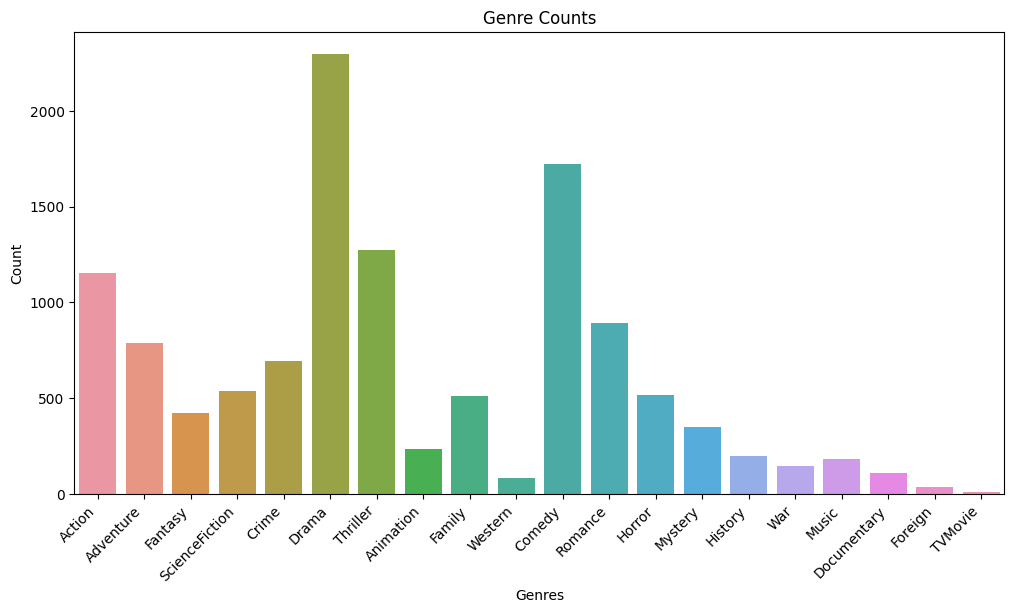

In [285]:
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_count_series.index, y=genre_count_series.values)
plt.title('Genre Counts')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

In [286]:
movies['overview']=movies['overview'].apply(lambda x:x.split())

In [287]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [288]:
movie_wdf = movies[['movie_id','title','tags']]

In [289]:
movie_wdf['tags'] = movie_wdf['tags'].apply(lambda x:" ".join(x)).apply(lambda x:x.lower())

<ipython-input-289-58cc621b6513>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_wdf['tags'] = movie_wdf['tags'].apply(lambda x:" ".join(x)).apply(lambda x:x.lower())


In [290]:
movie_wdf['tags'] = movie_wdf['tags'].apply(stem)

<ipython-input-290-969dcb38a68b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movie_wdf['tags'] = movie_wdf['tags'].apply(stem)


In [291]:
movie_wdf.head()

,movie_id,title,tags
0,19995,Avatar,"in the 22nd century, a parapleg marin is dispa..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believ to be dead, ha c..."
2,206647,Spectre,a cryptic messag from bond’ past send him on a...
3,49026,The Dark Knight Rises,follow the death of district attorney harvey d...
4,49529,John Carter,"john carter is a war-weary, former militari ca..."


In [292]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [293]:
vectors=cv.fit_transform(movie_wdf['tags']).toarray()

In [294]:
from sklearn.metrics.pairwise import cosine_similarity

In [295]:
similarity=cosine_similarity(vectors)

In [296]:
def recommend(movie):
  movie_index = movie_wdf[movie_wdf['title']==movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:1501]
  c=0
  for i in movies_list:
    c+=1
    print(f'{c}){movie_wdf.iloc[i[0]].title}')

In [297]:
recommend('Harry Potter and the Prisoner of Azkaban')
# Batman Begins')

1)Harry Potter and the Chamber of Secrets
2)Harry Potter and the Goblet of Fire
3)Harry Potter and the Order of the Phoenix
4)Harry Potter and the Half-Blood Prince
5)Harry Potter and the Philosopher's Stone
6)A Simple Wish
7)Now You See Me 2
8)The Chronicles of Narnia: The Voyage of the Dawn Treader
9)Back to the Future Part II
10)DragonHeart
11)Night at the Museum: Secret of the Tomb
12)Warcraft
13)This Christmas
14)Goldfinger
15)Pocahontas
16)The Adventures of Pinocchio
17)The Indian in the Cupboard
18)Night at the Museum: Battle of the Smithsonian
19)The Oogieloves in the Big Balloon Adventure
20)Goosebumps
21)Red Riding Hood
22)Mary Poppins
23)Last Action Hero
24)The Brothers Grimm
25)Practical Magic
26)The Kid
27)Pitch Black
28)The Ant Bully
29)Inkheart
30)The Hole
31)Nanny McPhee and the Big Bang
32)The Work and the Glory
33)Pete's Dragon
34)Dragon Nest: Warriors' Dawn
35)Pan
36)Ice Age: The Meltdown
37)Spirited Away
38)Alice Through the Looking Glass
39)The Lion of Judah
40)The